In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

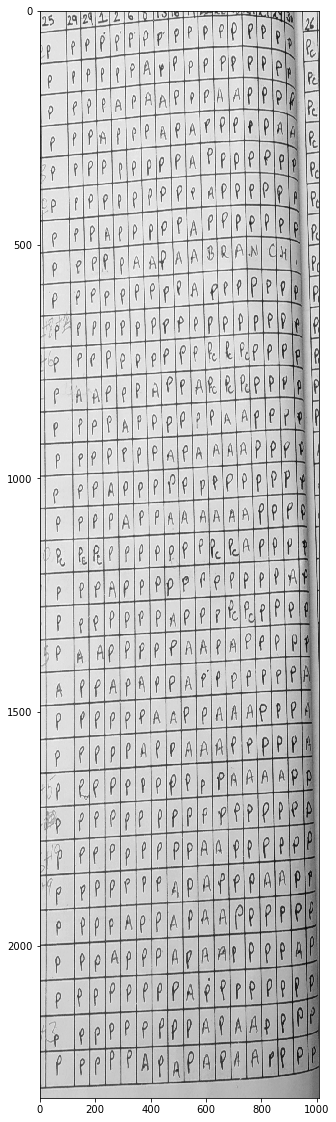

In [2]:
img = cv2.imread('./images/register2.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (5,20))
plt.imshow(img, cmap='gray', aspect='auto')

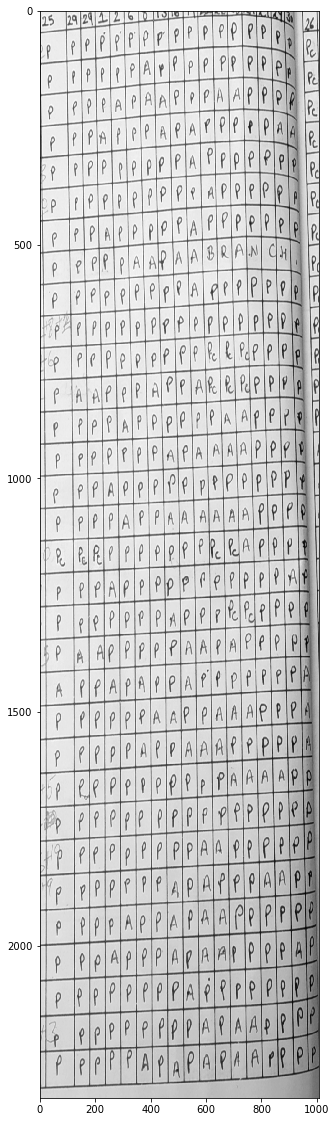

In [3]:
gray = cv2.GaussianBlur(img,(3, 3),0)
plt.figure(figsize = (5,20))
plt.imshow(gray, cmap='gray', aspect='auto')

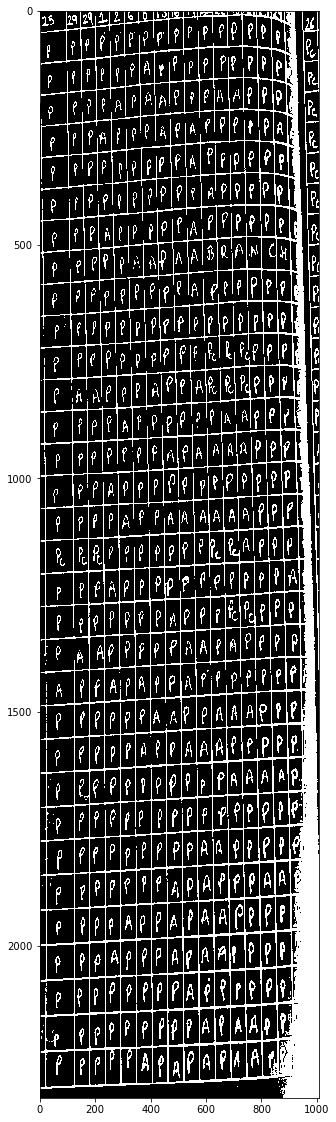

In [10]:
# Thresholding the image
(thresh, img_bin) = cv2.threshold(gray, 50, 150,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
plt.figure(figsize = (5,20))
plt.imshow(img_bin, cmap='gray', aspect='auto')

In [11]:
def lines(imgx, kernel_length = 20):
    
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
   
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(imgx, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=5)

    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(imgx, hori_kernel, iterations=2)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=10)
    
    return kernel, verticle_lines_img, horizontal_lines_img


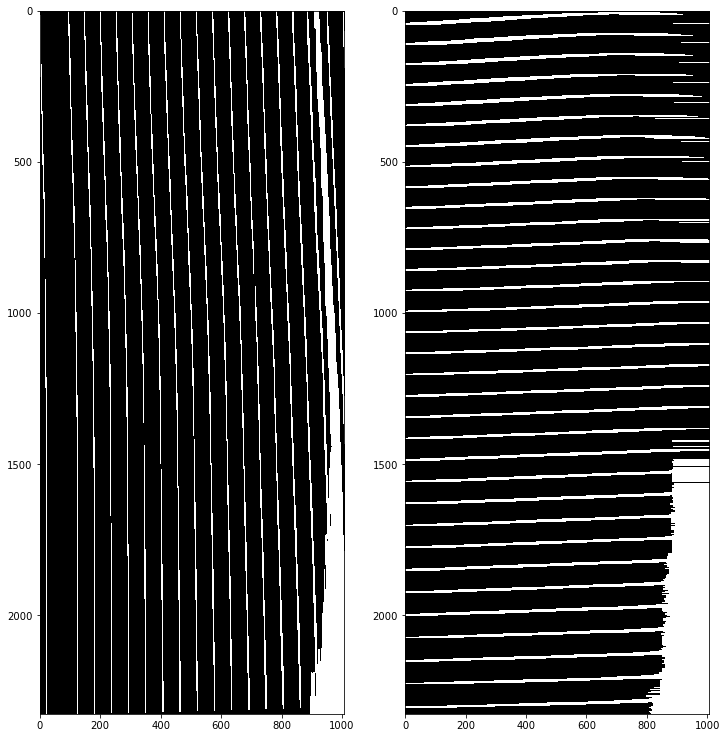

In [12]:
kernel, verticle_lines_img, horizontal_lines_img = lines(img_bin, 20)
plt.figure(figsize = (12,20))
plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.imshow(verticle_lines_img, cmap="gray");
plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.imshow(horizontal_lines_img, cmap="gray");

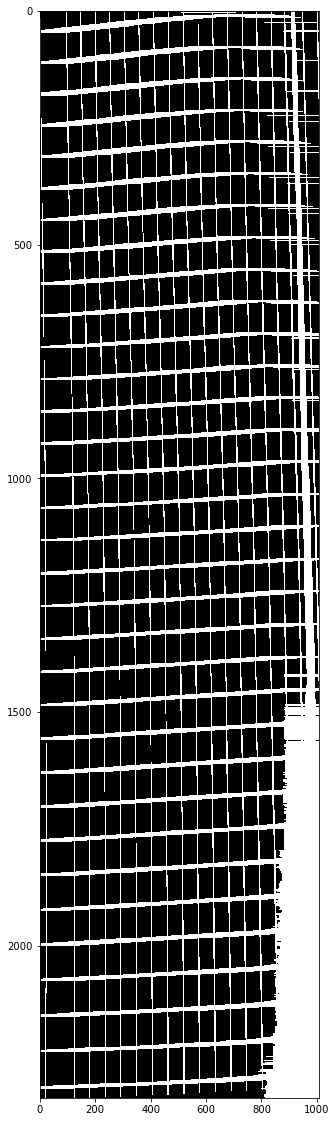

In [13]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.8
beta = 1.0 
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize = (5,20))
plt.imshow(img_final_bin, cmap='gray', aspect='auto')

In [14]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
def get_images(cnts):
    images = []
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        # If the box height is greater then 20, widht is > 20
        if (w > 20 and h > 20):
            new_img = img[y:y+h, x:x+w]
            new_img = cv2.resize(new_img, (28, 28), interpolation = cv2.INTER_AREA)
            images.append(new_img)
    
    return np.array(images)

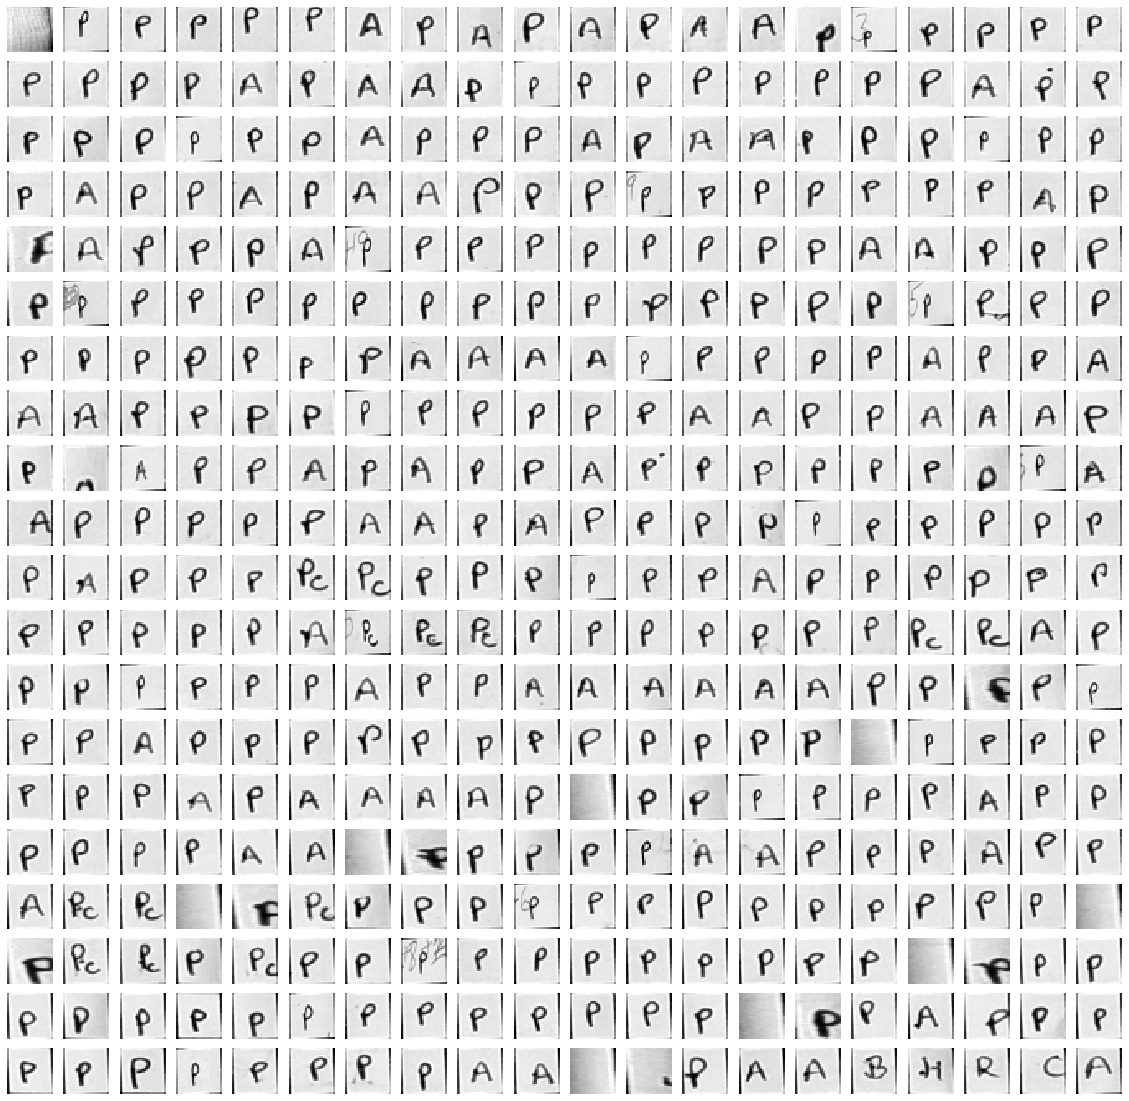

In [18]:
plt.figure(figsize = (20,20))
idx = 0
images = get_images(contours)
for i in images[:400]:
    idx += 1
    plt.subplot(20, 20, idx)
    plt.imshow(i, cmap='gray')
    plt.axis('off')

In [19]:
np.save('register2_images', images)